In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

random.seed(500)

In [53]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
data.shape

(303, 14)

In [55]:
corrmat = data.corr()
corrmat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [56]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

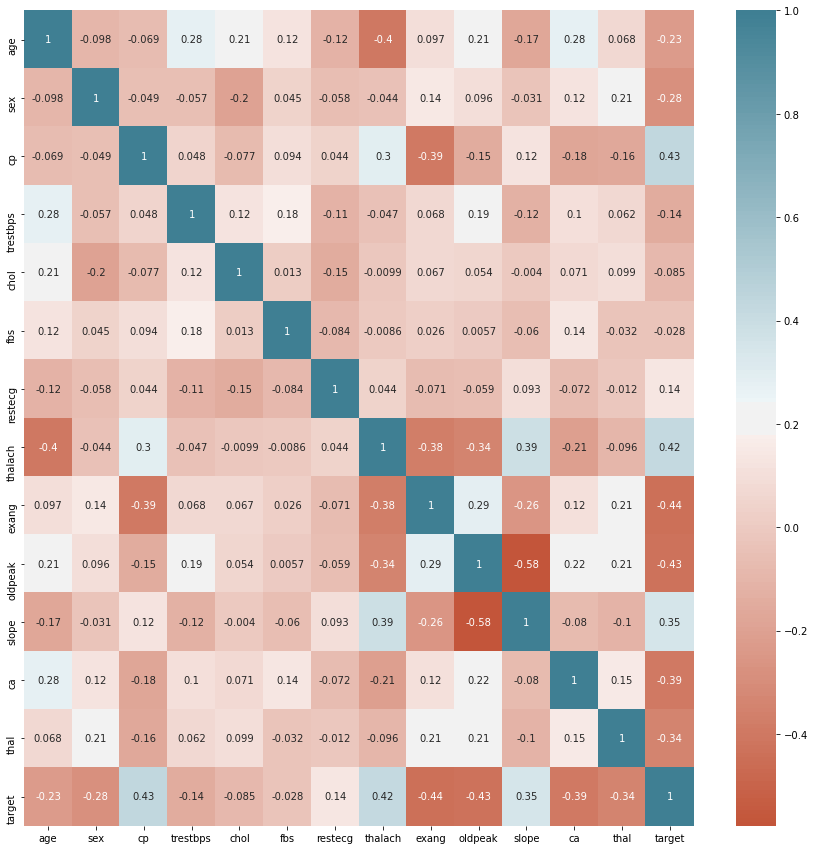

In [57]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True, cmap = sns.diverging_palette(20, 220, n=200))

In [58]:
X = data.iloc[:,[2,7]]
y = data.iloc[:,-1:]
X.head(3)
y.head(3)

,target
0,1
1,1
2,1


In [59]:
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

C:\Users\jadha\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [60]:
# scale the data between -1 to 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[ 1.97312292  0.01544279]
 [ 1.00257707  1.63347147]
 [ 0.03203122  0.97751389]
 [ 0.03203122  1.23989692]
 [-0.93851463  0.58393935]
 [-0.93851463 -0.07201822]
 [ 0.03203122  0.1466343 ]
 [ 0.03203122  1.0212444 ]
 [ 1.00257707  0.54020884]
 [ 1.00257707  1.0649749 ]
 [-0.93851463  0.45274783]
 [ 1.00257707 -0.46559277]
 [ 0.03203122  0.93378339]
 [ 1.97312292 -0.24694024]
 [ 1.97312292  0.54020884]
 [ 1.00257707  0.36528682]
 [ 1.00257707  0.97751389]
 [ 1.97312292 -1.55885539]
 [-0.93851463  0.93378339]
 [ 1.97312292  0.05917329]
 [-0.93851463  0.49647834]
 [ 1.00257707  1.28362743]
 [-0.93851463  1.23989692]
 [ 1.00257707 -0.55305378]
 [ 1.97312292  1.23989692]
 [ 0.03203122  0.54020884]
 [ 1.00257707  0.32155632]
 [ 1.00257707 -1.16528085]
 [ 1.00257707  0.32155632]
 [ 1.00257707  0.1029038 ]
 [ 0.03203122  0.80259187]
 [-0.93851463 -0.42186226]
 [ 0.03203122  1.67720197]
 [ 1.00257707  0.1029038 ]
 [ 1.97312292 -1.07781984]
 [ 1.00257707  0.45274783]
 [ 1.00257707  0.89005288]
 

In [61]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [72]:
from sklearn.svm import SVC
from sklearn import metrics
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7213114754098361


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


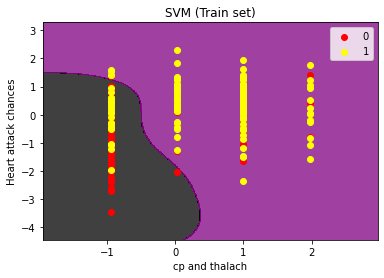

In [73]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min() - 1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,svc.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                        alpha=0.75,cmap=ListedColormap(('black','purple')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1],
               c=ListedColormap(['red','yellow'])(i),label=j)

plt.title('SVM (Train set)')
plt.xlabel('cp and thalach')
plt.ylabel('Heart attack chances')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


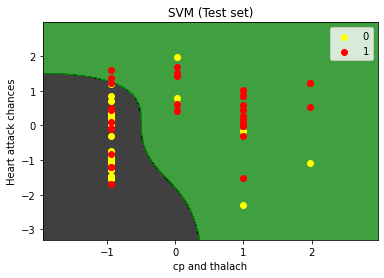

In [74]:
X_set,y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min() - 1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,svc.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                        alpha=0.75,cmap=ListedColormap(('black','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1],
               c=ListedColormap(['yellow','red'])(i),label=j)

plt.title('SVM (Test set)')
plt.xlabel('cp and thalach')
plt.ylabel('Heart attack chances')
plt.legend()
plt.show()

In [75]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7377049180327869


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


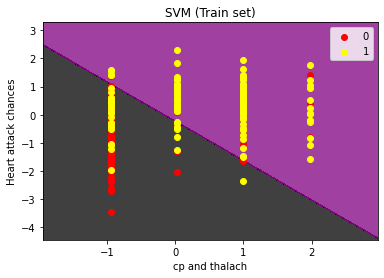

In [76]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min() - 1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,svc.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                        alpha=0.75,cmap=ListedColormap(('black','purple')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1],
               c=ListedColormap(['red','yellow'])(i),label=j)

plt.title('SVM (Train set)')
plt.xlabel('cp and thalach')
plt.ylabel('Heart attack chances')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


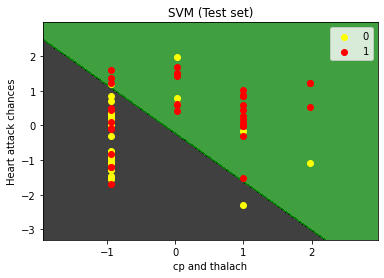

In [77]:
X_set,y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min() - 1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,svc.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                        alpha=0.75,cmap=ListedColormap(('black','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1],
               c=ListedColormap(['yellow','red'])(i),label=j)

plt.title('SVM (Test set)')
plt.xlabel('cp and thalach')
plt.ylabel('Heart attack chances')
plt.legend()
plt.show()

In [78]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.6721311475409836


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


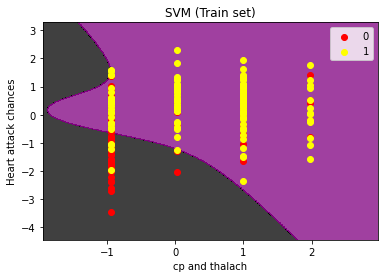

In [79]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min() - 1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,svc.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                        alpha=0.75,cmap=ListedColormap(('black','purple')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1],
               c=ListedColormap(['red','yellow'])(i),label=j)

plt.title('SVM (Train set)')
plt.xlabel('cp and thalach')
plt.ylabel('Heart attack chances')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


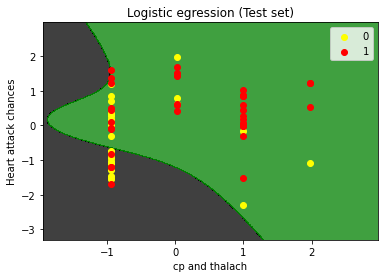

In [80]:
X_set,y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min() - 1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,svc.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                        alpha=0.75,cmap=ListedColormap(('black','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1],
               c=ListedColormap(['yellow','red'])(i),label=j)

plt.title('Logistic egression (Test set)')
plt.xlabel('cp and thalach')
plt.ylabel('Heart attack chances')
plt.legend()
plt.show()

In [14]:
# cross-validation import from sklearn
from sklearn.model_selection import cross_val_score

C_range = list(range(1,25))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear',C=c)
    scores = cross_val_score(svc,X,y,cv=10,scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.7555913978494624, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7621505376344084, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957]


In [15]:
# plt.figure(figsize=(10,6))
# C_values = list(range(1,25))
# # plot C values in X-axis and cross_validate_accuracy on y-axis
# plt.plot(C_values,acc_score)
# plt.xticks(np.arange(0,25,1))
# plt.xlabel('Value of C for SVM')
# plt.ylabel('Cross-Validate Accuracy')

In [16]:
C_range = list(np.arange(0.1,2,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear',C=c)
    scores = cross_val_score(svc,X,y,cv=10,scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.7687096774193548, 0.7621505376344084, 0.7588172043010751, 0.7621505376344084, 0.7621505376344084, 0.7621505376344084, 0.7621505376344084, 0.7621505376344084, 0.7555913978494624, 0.7555913978494624, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7589247311827957, 0.7621505376344084, 0.7589247311827957, 0.7589247311827957]


In [17]:
# plt.figure(figsize=(10,6))
# C_values = list(np.arange(0.1,2,0.1))
# # plot C values in X-axis and cross_validate_accuracy on y-axis
# plt.plot(C_values,acc_score)
# plt.xticks(np.arange(0.1,2,0.1))
# plt.xlabel('Value of C for SVM')
# plt.ylabel('Cross-Validate Accuracy')

In [18]:
gamma_range = [0.0001,0.001,0.01,0.1,1,10,100]
acc_score = []
for g in gamma_range:
    svc = SVC(kernel='rbf',gamma=g)
    scores = cross_val_score(svc,X,y,cv=10,scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.5445161290322581, 0.5445161290322581, 0.7654838709677418, 0.752258064516129, 0.7688172043010753, 0.7458064516129033, 0.7029032258064516]


In [19]:
# %matplotlib inline
# plt.figure(figsize=(20,6))
# gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# # plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(gamma_range,acc_score)
# plt.xlabel('Value of gamma for SVC ')
# plt.xticks(np.arange(0.0001,100,5))
# plt.ylabel('Cross-Validated Accuracy')

In [20]:
tuned_parameter = {
    'C':(np.arange(0.01,1,0.01)),'kernel':['linear'],
    'C':(np.arange(0.01,1,0.01)),'gamma':[0.01,0.02,0.03,0.04,0.05],'kernel':['rbf'],
    'degree':[2,3,4,5], 'gamma':[0.01,0.02,0.03,0.04,0.05],'C':(np.arange(0.01,1,0.01)),'kernel':['poly']
}

In [21]:
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svc,tuned_parameter,cv=10,scoring='accuracy')

In [22]:
model_svm.fit(X_train,y_train)
print(model_svm.best_score_)

0.5371666666666667


In [48]:
print(model_svm.best_params_)

{'C': 0.86, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}


In [50]:
svc = SVC(kernel='linear',C=0.96,degree=3,gamma=0.05)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7377049180327869


In [51]:
from sklearn.metrics import confusion_matrix,classification_report,recall_score,roc_curve,precision_score,roc_auc_score
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[16,  9],
       [ 7, 29]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

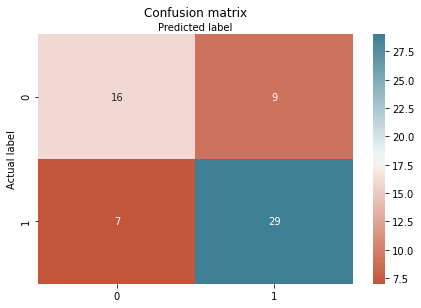

In [43]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=sns.diverging_palette(20, 220, n=200) ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
recall = recall_score(y_test,y_pred)
recall

0.8055555555555556

In [45]:
precision = precision_score(y_test,y_pred)
precision

0.7631578947368421

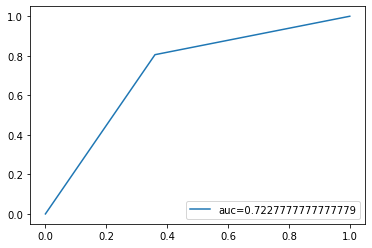

In [46]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [30]:
data_prediction = svc.predict(X)
data_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,